<a href="https://colab.research.google.com/github/benson955/pyth/blob/main/dex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
housing = datasets.load_boston()

In [2]:
print(housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd
df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])

In [4]:
df['MEDV'] = housing['target']
y=df['MEDV'].copy()
del df['MEDV']
df = pd.concat((y, df), axis = 1)

In [5]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
  del df[col]

In [9]:
df.describe().T
cols = ['RM', 'AGE','TAX','LSTAT','MEDV']
df[cols].head()
df[cols].corr

<bound method DataFrame.corr of         RM   AGE    TAX  LSTAT  MEDV
0    6.575  65.2  296.0   4.98  24.0
1    6.421  78.9  242.0   9.14  21.6
2    7.185  61.1  242.0   4.03  34.7
3    6.998  45.8  222.0   2.94  33.4
4    7.147  54.2  222.0   5.33  36.2
..     ...   ...    ...    ...   ...
501  6.593  69.1  273.0   9.67  22.4
502  6.120  76.7  273.0   9.08  20.6
503  6.976  91.0  273.0   5.64  23.9
504  6.794  89.3  273.0   6.48  22.0
505  6.030  80.8  273.0   7.88  11.9

[506 rows x 5 columns]>

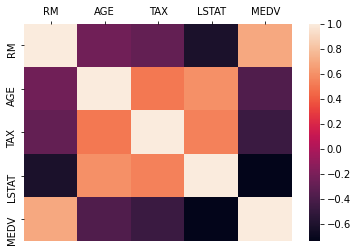

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(df[cols].corr())
cmap = sns.cubehelix_palette(20, light=0.95, dark=0.15)
ax.xaxis.tick_top()
#saving isn't the same on colab
#plt.savefig('../figures/lesson-1-boston-housing-corr.png', bbox_inches='tight', dpi=300)

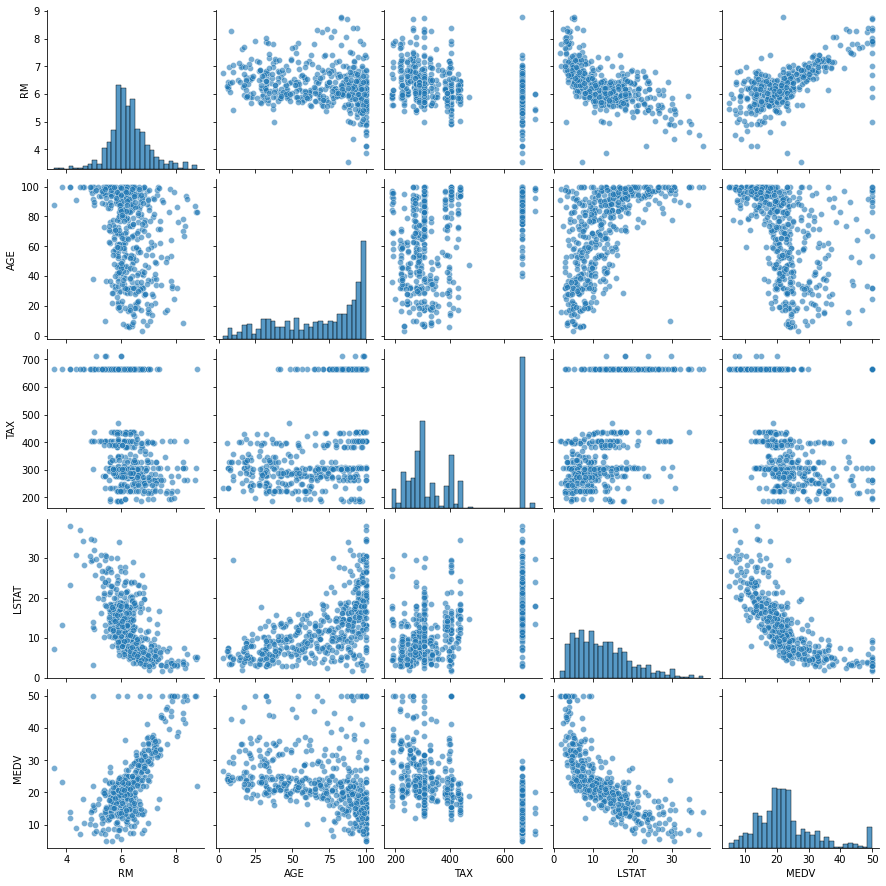

In [17]:
sns.pairplot(df[cols], plot_kws={'alpha':0.6}, diag_kws={'bins':30})